In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
import pandas as pd

df = pd.read_excel('/Users/andreasbrogaard/Documents/dsp_project/dsp_project/Data Collection/gpt_response_clean copy.xlsx')

#df_train = df[['Type', 'Ask.price', 'Year_built', 'Energy_rating', 'Monthly_ownership_cost', 'Days_desc', 'Municipality', 'Rooms', 'Monthly_ownership_cost.1', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']]
#df = df[[ 'Ask.price', 'Type', 'Year_built', 'Energy_rating', 'Monthly_ownership_cost', 'Days_desc', 'Municipality', 'Rooms', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']]
df.head()




,0,Type,Ask.price,Year_built,Energy_rating,Monthly_ownership_cost,Days_desc,Description,Municipality,Rooms,...,Balcony,Garden,Parking,Swimming pool,Fireplace,Garage,Basement,Elevator,Air_conditioning,Heating_type
0,Tingskovvej 70,Villa,2499000,1911.0,D,2466,51-100,Hyggelig villa med fede udearealer\nI Tranbjer...,Tranbjerg J,3.0,...,True,True,True,False,True,True,False,False,False,not_stated
1,"Sejrøgade 18, 4. TH",Ejerlejlighed,3495000,1930.0,D,3918,21-50,Flot 3-værelses lejlighed i Ø-gadekvarteret\nB...,Aarhus C,3.0,...,False,False,False,False,False,False,False,False,False,not_stated
2,Todderupparken 14,Villa,2748000,1970.0,D,2638,100+,1-plans familievilla på lukket vej\nDen yderst...,Tilst,4.0,...,False,True,True,False,False,False,False,False,False,not_stated
3,"Østergårdsvej 248, Astrup",Villa,3650000,1900.0,A2010,3204,1-10,Spændende ved­li­ge­hol­del­ses­ven­lig villa\...,Solbjerg,4.0,...,False,True,False,False,True,False,False,False,False,not_stated
4,"Grøfthøjparken 162, 3. th",Ejerlejlighed,1199000,1970.0,B,2050,1-10,"Fin 2´er i ""højhuset"" - pæn og nydelig\nI højh...",Viby J,2.0,...,False,False,False,False,False,False,False,False,False,not_stated


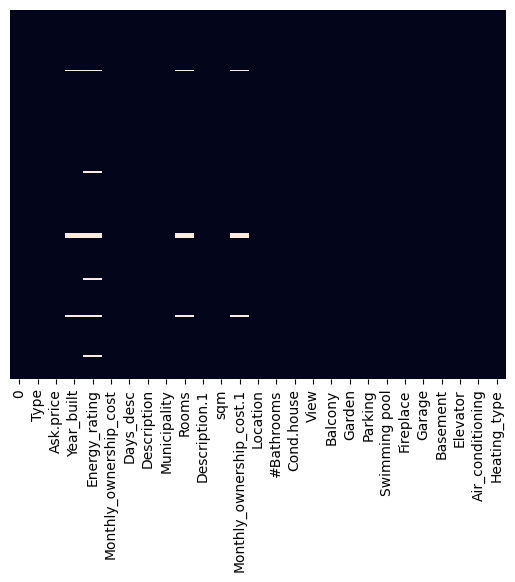

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the missing value
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

# Show the plot
plt.show()

In [29]:
na_rows = df[df.isna().any(axis=1)]
na_indices = na_rows.index.tolist()
print("NA rows:")
print(na_rows)
print("NA row indices:")
print(na_indices)

df.dropna(inplace=True)


NA rows:
                       0         Type  Ask.price  Year_built Energy_rating  \
32        Skovbjergvej 7  Helårsgrund    2995000         NaN           NaN   
86      Under Rønnene 32   Fritidshus    3198000      1981.0           NaN   
119        Østerbyvej 1B  Helårsgrund    2295000         NaN           NaN   
120        Østerbyvej 1A  Helårsgrund    2295000         NaN           NaN   
121        Østerbyvej 1C  Helårsgrund    2295000         NaN           NaN   
143       Havlundsvej 34   Fritidshus    7998000      1986.0           NaN   
163  Onsholtgårdsvej 108  Helårsgrund    2498000         NaN           NaN   
184         Nobilisvej 9   Fritidshus    3198000      1964.0           NaN   

     Monthly_ownership_cost Days_desc  \
32                     1270     11-20   
86                     2889    51-100   
119                     448    51-100   
120                     454    51-100   
121                     537    51-100   
143                    3691      100+   
1

In [30]:
df.info()
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0 to 196
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   0                         189 non-null    object  
 1   Type                      189 non-null    object  
 2   Ask.price                 189 non-null    int64   
 3   Year_built                189 non-null    float64 
 4   Energy_rating             189 non-null    object  
 5   Monthly_ownership_cost    189 non-null    int64   
 6   Days_desc                 189 non-null    category
 7   Description               189 non-null    object  
 8   Municipality              189 non-null    category
 9   Rooms                     189 non-null    float64 
 10  Description.1             189 non-null    object  
 11  sqm                       189 non-null    int64   
 12  Monthly_ownership_cost.1  189 non-null    float64 
 13  Location                  189 non-null    object  
 14 

In [25]:
import numpy as np
import seaborn as sns
boolean_vars = ['Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']

for var in boolean_vars:
    print(df[var].value_counts())
    print()





Balcony
False    137
True      52
Name: count, dtype: int64

Garden
True     121
False     68
Name: count, dtype: int64

Parking
True     128
False     61
Name: count, dtype: int64

Swimming pool
False    188
True       1
Name: count, dtype: int64

Fireplace
False    161
True      28
Name: count, dtype: int64

Garage
False    133
True      56
Name: count, dtype: int64

Basement
False    140
True      49
Name: count, dtype: int64

Elevator
False    184
True       5
Name: count, dtype: int64

Air_conditioning
False    189
Name: count, dtype: int64

Heating_type
not_stated                     156
Gulvvarme                       12
floor heating                    8
fjernvarme                       2
Radiators                        2
Var­me­gen­vin­dings­an­læg      2
zoneopdelt gulvvarme             1
solar                            1
Radiator                         1
Brændeovn                        1
luft til vand varmepumpe         1
gulvvarme                        1
Floor heating 

<H1> correcting the data types

In [31]:
df['Ask.price'] = pd.to_numeric(df['Ask.price'], errors='coerce')
df['Monthly_ownership_cost'] = pd.to_numeric(df['Monthly_ownership_cost'], errors='coerce')
df['Days_desc'] = df['Days_desc'].astype('category')
df['Municipality'] = df['Municipality'].astype('category')
df['Year_built'] = df['Year_built'].astype(int)
df['Rooms'] = df['Rooms'].astype(int)
df['sqm'] = df['sqm'].astype(int)
df['Energy_rating'] = df['Energy_rating'].astype('category')
df['Location'] = df['Location'].astype('category')
df['#Bathrooms'] = df['#Bathrooms'].astype('category')
df['cond.house'] = df['Cond.house'].astype('category')
df['View'] = df['View'].astype('category')

#Rest of the columns are boolean, pandas have already converted them to boolean



In [33]:
import seaborn as sns
numerical_vars = ['Ask.price', 'Year_built', 'Monthly_ownership_cost','sqm', 'Rooms', '#Bathrooms']

numerical_stats = df[numerical_vars].describe()
print(numerical_stats)



categorical_vars = ['Type', 'Energy_rating', 'Municipality', 'Cond.house', 'View', 'Heating_type', 'Balcony', 'Garden']

# Calculate frequency counts for categorical variables
for var in categorical_vars:
    freq_counts = df[var].value_counts()
    print(f"Frequency counts for {var}:")
    print(freq_counts)
    print()

# Calculate mode for categorical variables
for var in categorical_vars:
    mode_val = df[var].mode().values[0]
    print(f"Mode for {var}: {mode_val}")
    print()



          Ask.price   Year_built  Monthly_ownership_cost         sqm  \
count  1.890000e+02   189.000000              189.000000  189.000000   
mean   3.781498e+06  1961.031746             3247.978836  118.359788   
std    2.606676e+06    37.843730             1310.508396   53.514143   
min    4.950000e+05  1850.000000             1398.000000   27.000000   
25%    2.299000e+06  1937.000000             2410.000000   76.000000   
50%    2.998000e+06  1968.000000             2938.000000  113.000000   
75%    4.395000e+06  1986.000000             3748.000000  152.000000   
max    1.850000e+07  2023.000000            10878.000000  306.000000   

            Rooms  
count  189.000000  
mean     2.968254  
std      1.036077  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      6.000000  
Frequency counts for Type:
Type
Villa            83
Ejerlejlighed    67
Rækkehus         32
Andelsbolig       5
Landejendom       2
Name: count, dtype: int64

Frequency co

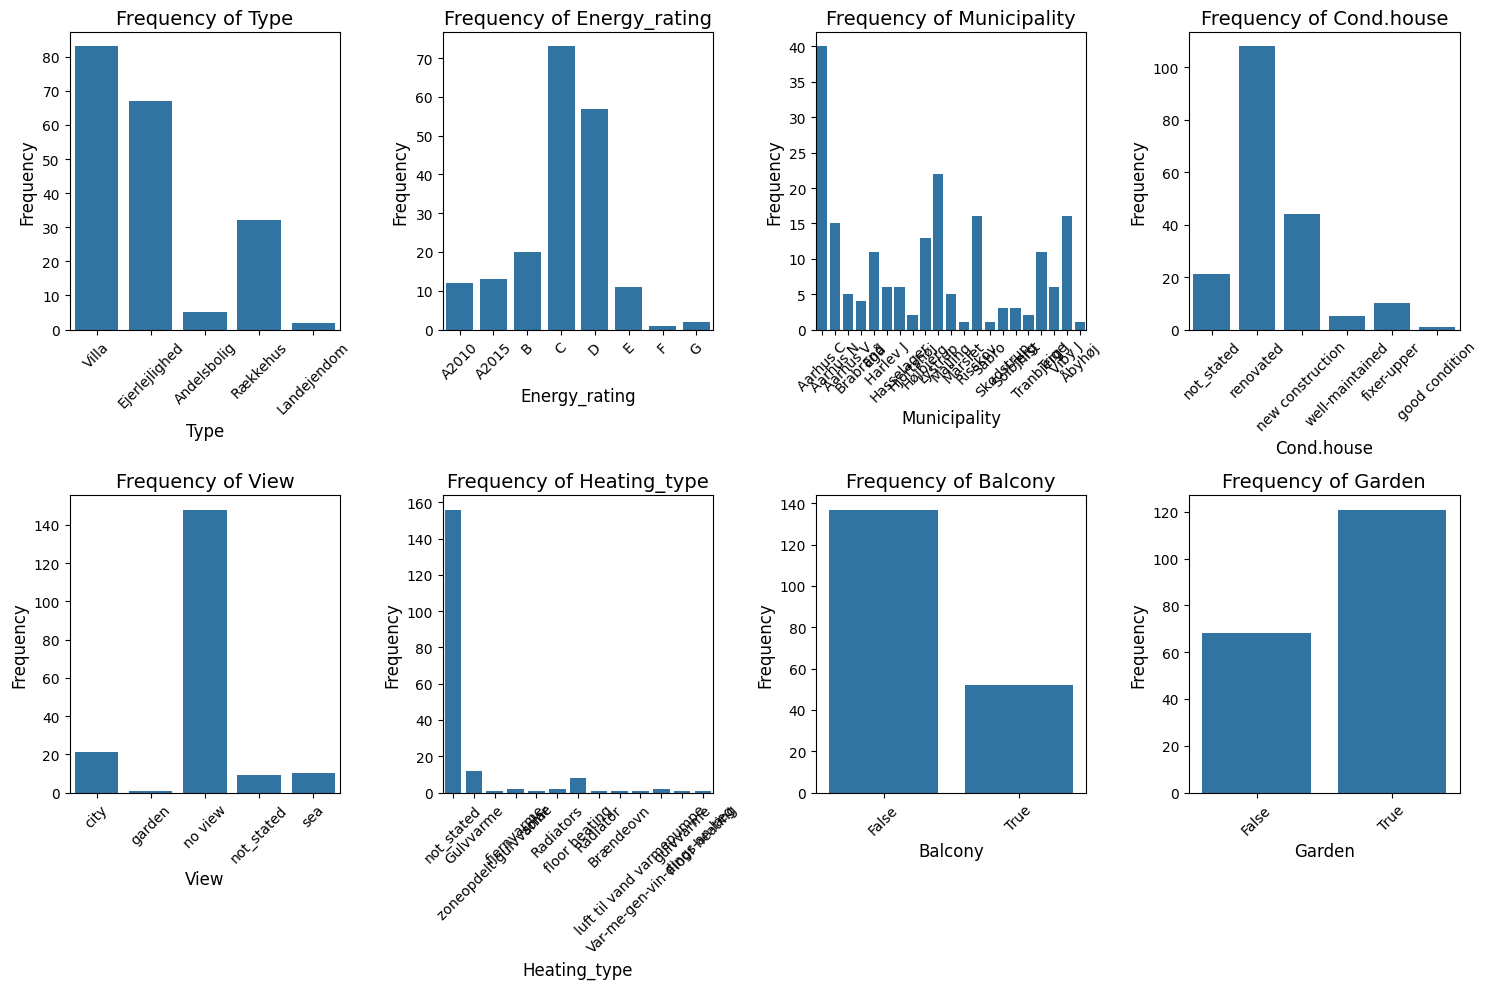

In [34]:
import matplotlib.pyplot as plt

num_rows = 2
num_cols = 4

# Create a new figure and set the size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Iterate over the categorical variables and create bar plots
for i, var in enumerate(categorical_vars):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols
    
    # Create the bar plot in the current subplot
    sns.countplot(data=df, x=var, ax=axes[row, col])
    axes[row, col].set_xlabel(var, fontsize=12)  # font size
    axes[row, col].set_ylabel('Frequency', fontsize=12)
    axes[row, col].set_title(f'Frequency of {var}', fontsize=14)
    axes[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

plt.tight_layout()

# Show the plot
plt.show()


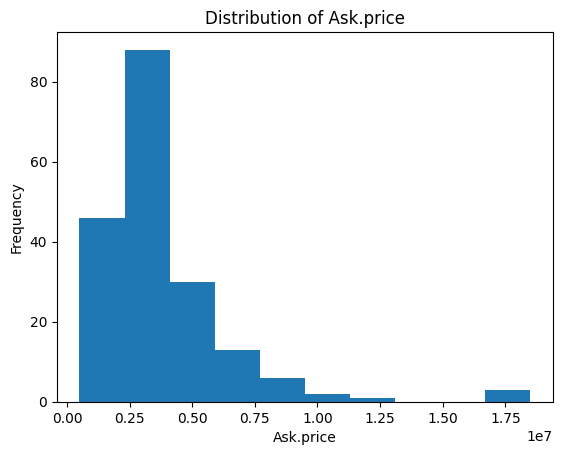

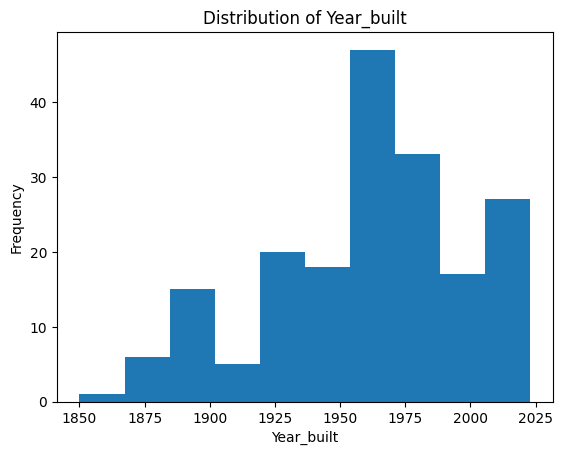

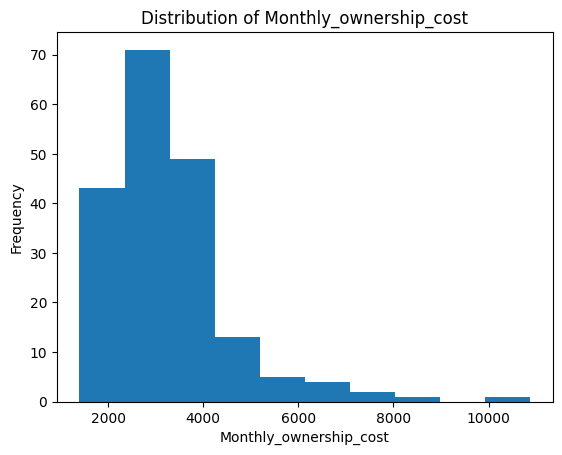

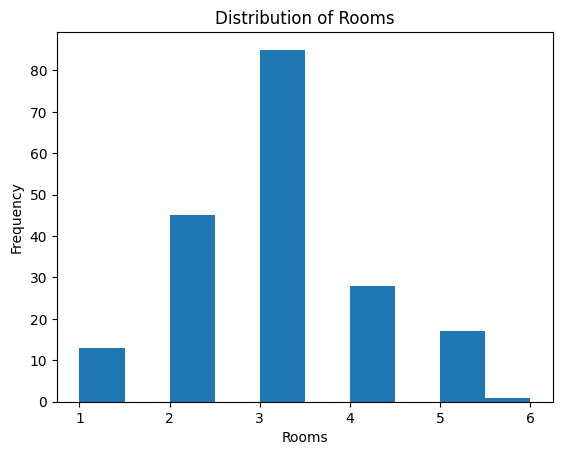

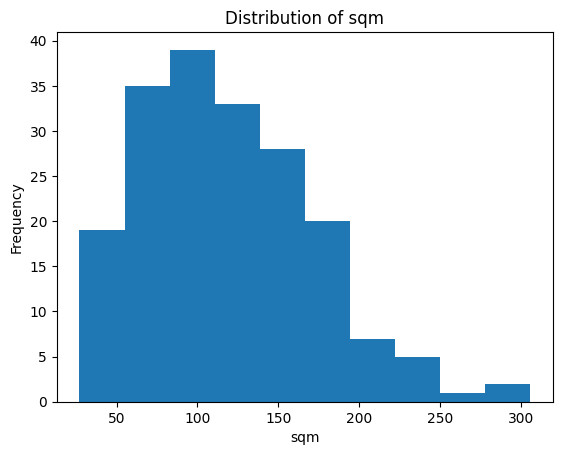

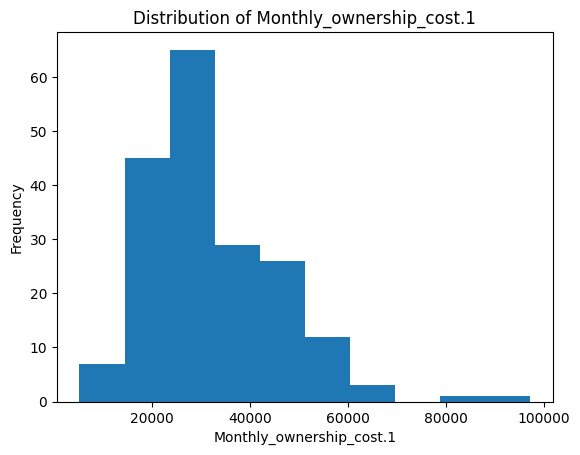

TypeError: no numeric data to plot

In [35]:
import matplotlib.pyplot as plt

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].plot(kind='hist', bins=10)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()


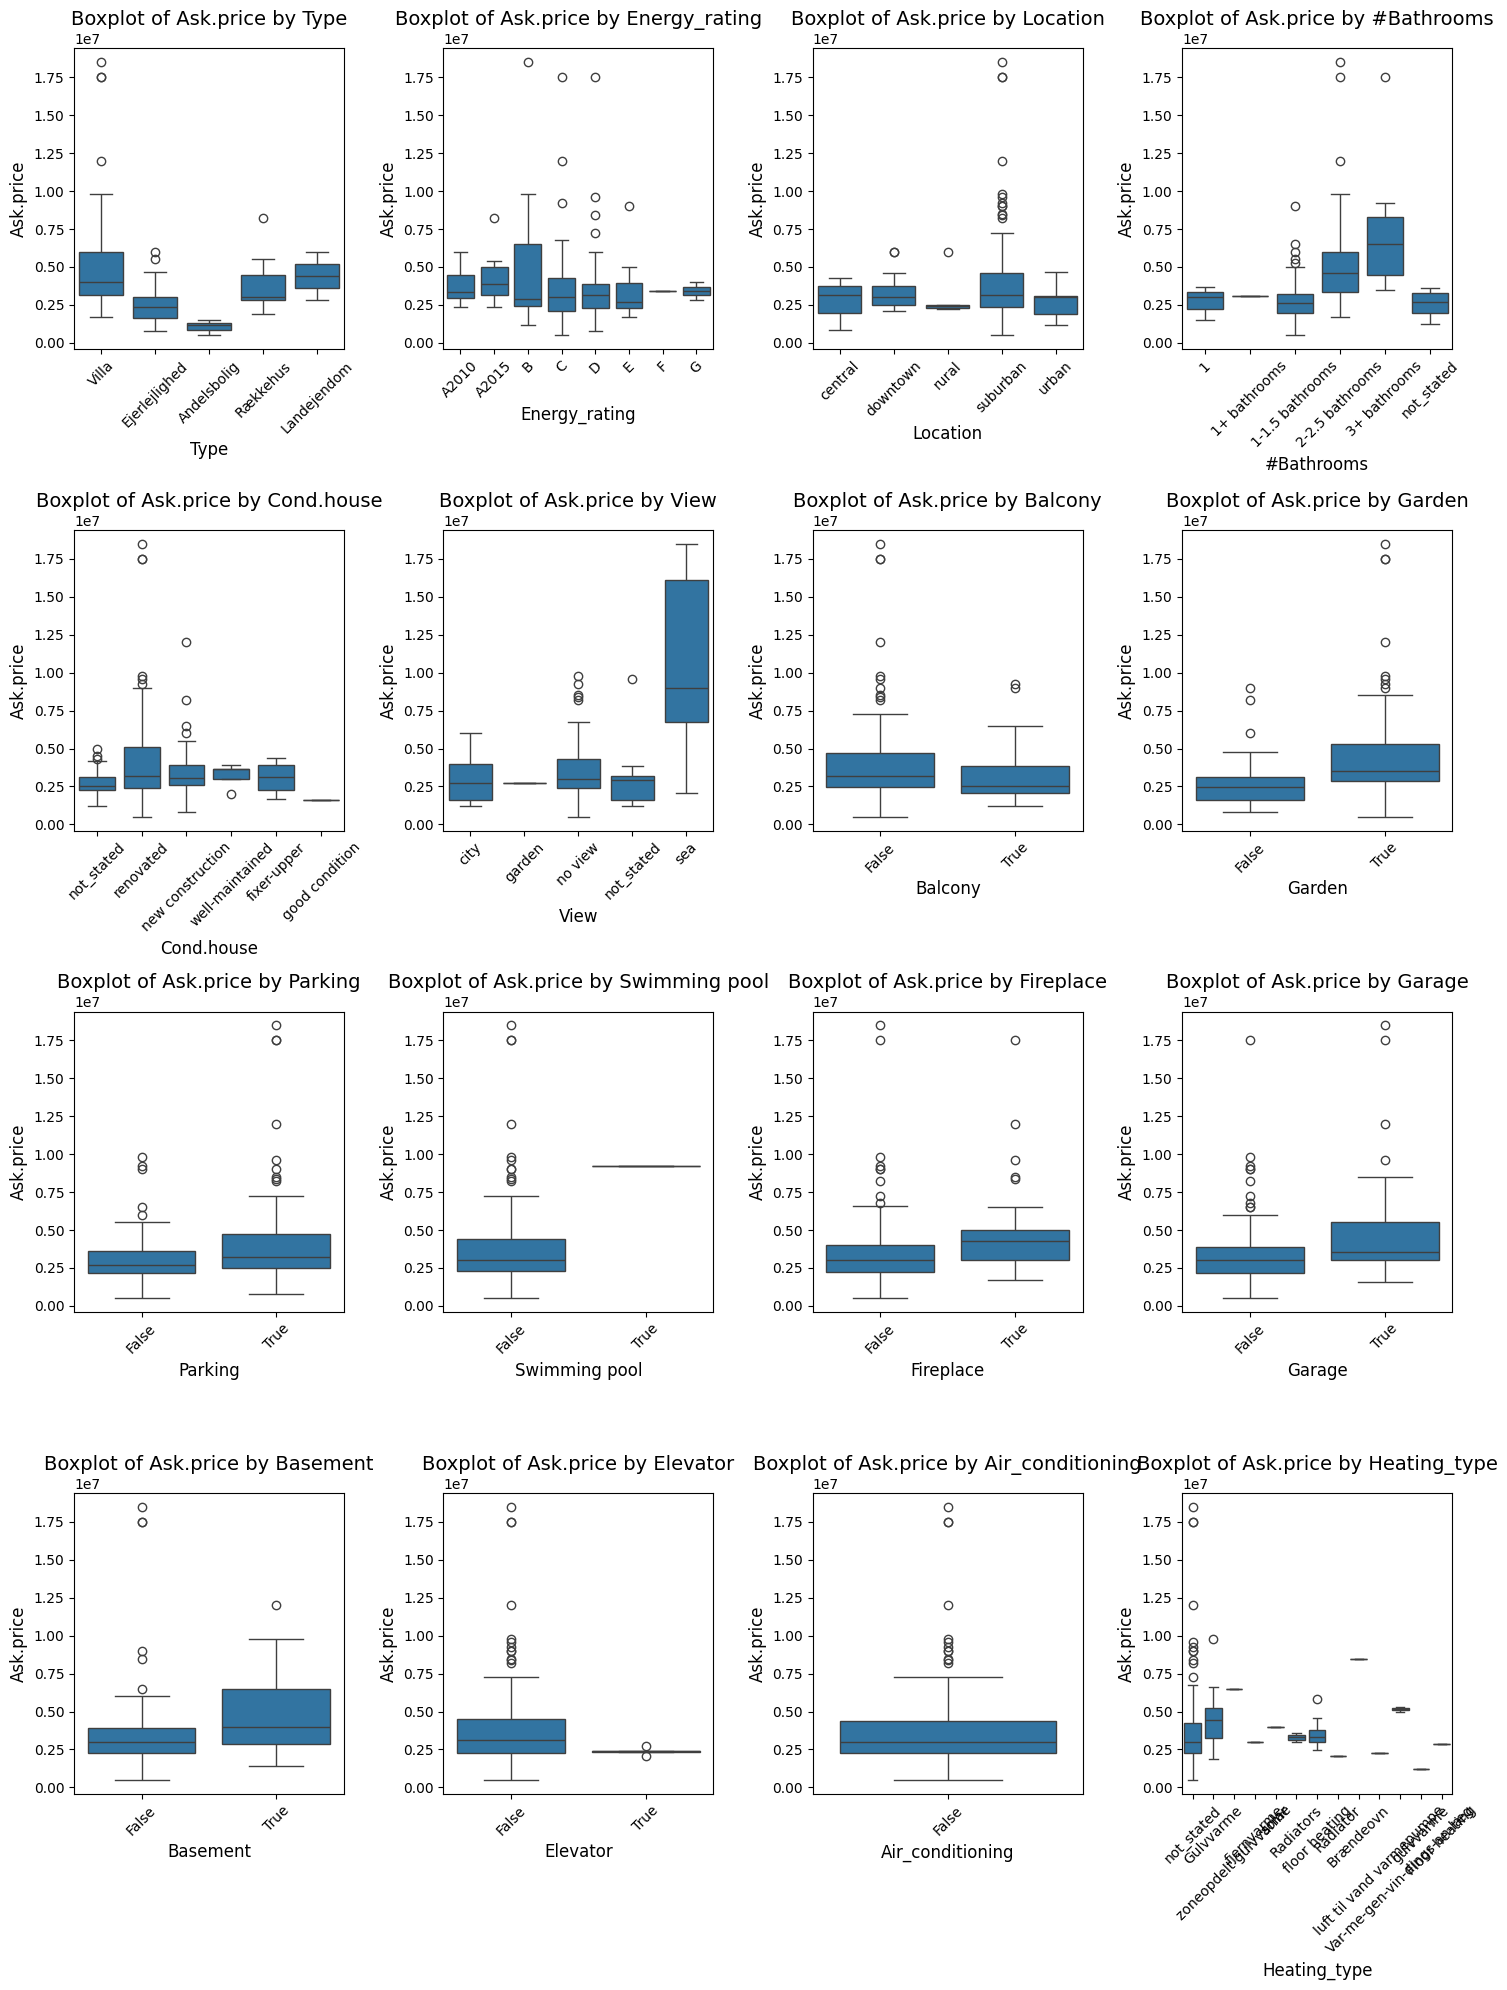

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['Type', 'Energy_rating', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']

num_rows = 4
num_cols = min(len(categorical_vars), 4)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Iterate over the categorical variables and create boxplots
for i, var in enumerate(categorical_vars):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols
    
    # Create the boxplot in the current subplot
    sns.boxplot(data=df, x=var, y='Ask.price', ax=axes[row, col])
    axes[row, col].set_xlabel(var, fontsize=12)  # Set font size
    axes[row, col].set_ylabel('Ask.price', fontsize=12)  
    axes[row, col].set_title(f'Boxplot of Ask.price by {var}', fontsize=14)  
    axes[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

plt.tight_layout()

# Show the plot
plt.show()


In [49]:
# Feature Engineering


# 3. Extract year information from 'Year_built' and create age feature
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Year_built']

# 4. Encode categorical variables with one-hot encoding
categorical_features = ['Type', 'Energy_rating', 'Municipality', 'Heating_type']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the modified dataframe
df_encoded.head()


,0,Ask.price,Year_built,Monthly_ownership_cost,Days_desc,Description,Rooms,Description.1,sqm,Monthly_ownership_cost.1,...,Heating_type_Radiator,Heating_type_Radiators,Heating_type_Var­me­gen­vin­dings­an­læg,Heating_type_fjernvarme,Heating_type_floor heating,Heating_type_gulvvarme,Heating_type_luft til vand varmepumpe,Heating_type_not_stated,Heating_type_solar,Heating_type_zoneopdelt gulvvarme
0,Tingskovvej 70,2499000,1911,2466,51-100,Hyggelig villa med fede udearealer\nI Tranbjer...,3,Hyggelig villa med fede udearealer\nI Tranbjer...,142,17599.0,...,False,False,False,False,False,False,False,True,False,False
1,"Sejrøgade 18, 4. TH",3495000,1930,3918,21-50,Flot 3-værelses lejlighed i Ø-gadekvarteret\nB...,3,Flot 3-værelses lejlighed i Ø-gadekvarteret\nB...,84,41607.0,...,False,False,False,False,False,False,False,True,False,False
2,Todderupparken 14,2748000,1970,2638,100+,1-plans familievilla på lukket vej\nDen yderst...,4,1-plans familievilla på lukket vej\nDen yderst...,140,19629.0,...,False,False,False,False,False,False,False,True,False,False
3,"Østergårdsvej 248, Astrup",3650000,1900,3204,1-10,Spændende ved­li­ge­hol­del­ses­ven­lig villa\...,4,Spændende ved­li­ge­hol­del­ses­ven­lig villa\...,208,17548.0,...,False,False,False,False,False,False,False,True,False,False
4,"Grøfthøjparken 162, 3. th",1199000,1970,2050,1-10,"Fin 2´er i ""højhuset"" - pæn og nydelig\nI højh...",2,"Fin 2´er i ""højhuset"" - pæn og nydelig\nI højh...",67,17896.0,...,False,False,False,False,False,False,False,True,False,False


In [60]:
df.columns

Index([                         0,                     'Type',
                      'Ask.price',               'Year_built',
                  'Energy_rating',   'Monthly_ownership_cost',
                      'Days_desc',              'Description',
                   'Municipality',                    'Rooms',
                  'Description.1',                      'sqm',
       'Monthly_ownership_cost.1',                 'Location',
                     '#Bathrooms',               'Cond.house',
                           'View',                  'Balcony',
                         'Garden',                  'Parking',
                  'Swimming pool',                'Fireplace',
                         'Garage',                 'Basement',
                       'Elevator',         'Air_conditioning',
                   'Heating_type',               'cond.house',
                            'Age'],
      dtype='object')

In [ ]:
# Selecting relevant columns excluding 'Description' and '0'
relevant_columns = df.columns.difference(['Description', 'Description.1', '0'])

# Creating a correlation matrix for these columns
correlation_matrix_all = df[relevant_columns].apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x).corr()

# Plotting the heatmap for all variables
plt.figure(figsize=(15, 10))
heatmap_all = sns.heatmap(correlation_matrix_all, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for All Variables (Excluding Descriptions)')
plt.show()


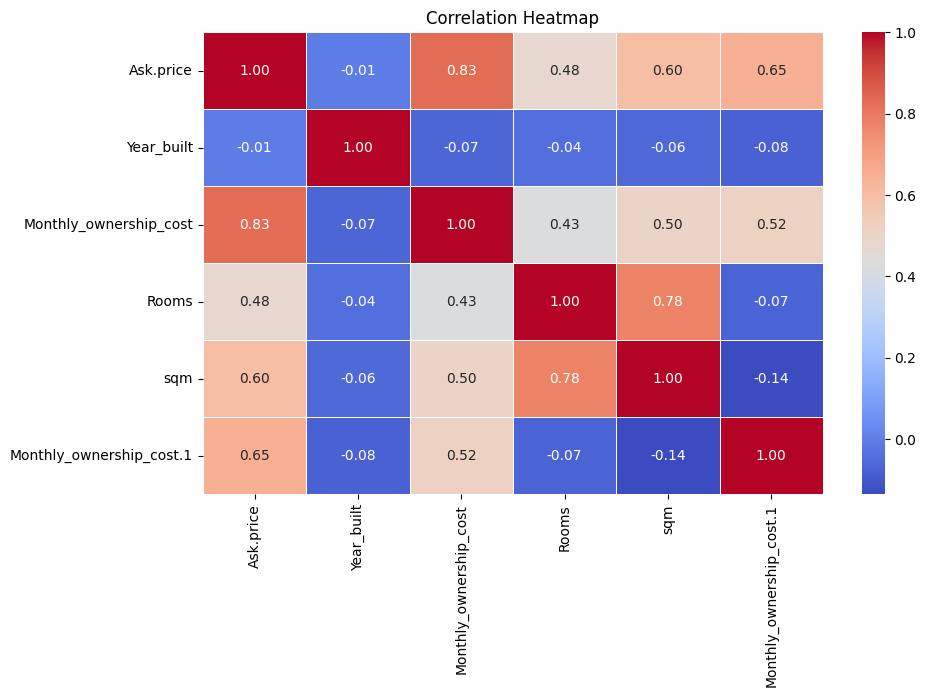

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns for correlation
numeric_columns = ['Ask.price', 'Year_built', 'Monthly_ownership_cost', 'Rooms', 'sqm', 'Monthly_ownership_cost.1']
correlation_matrix = df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


## Keyword analysis impact on asking price and days for sale

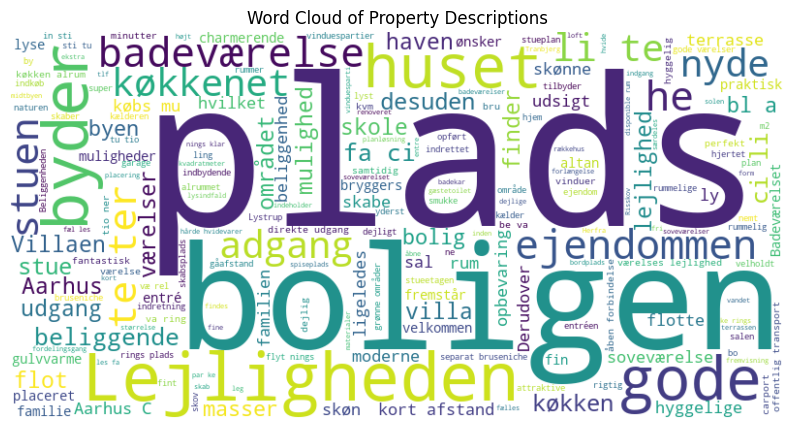

In [19]:


file_path = '/Users/andreasbrogaard/Documents/dsp_project/dsp_project/1. Data Exploration/stopord.txt'

with open(file_path, 'r') as file:
    stop_words = file.read().splitlines()

from wordcloud import WordCloud

# Combine all descriptions into a single text
all_descriptions = ' '.join(df['Description'].dropna())

# Generate a word cloud
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Property Descriptions')
plt.show()


In [ ]:
# Define a function to check if a keyword is in the description
def contains_keyword(keyword, text):
    return keyword in text

# Initialize a list for storing results
results = []

# Analyze impact of each keyword
keywords = ['plads', 'god', 'gode', 'byder', 'denne', 'aarhus', 'badeværelse', 'boligen']
for keyword in keywords:
    df[keyword] = df['Description'].apply(lambda x: contains_keyword(keyword, x))
    avg_price = df[df[keyword]]['Ask.price'].mean()
    avg_days_for_sale = df[df[keyword]]['days_for_sale'].mean()
    results.append({'Keyword': keyword, 'Avg_Ask_Price': avg_price, 'Avg_Days_for_Sale': avg_days_for_sale})

# Convert results to DataFrame
keyword_impact_df = pd.DataFrame(results)

keyword_impact_df


,Keyword,Avg_Ask_Price,Avg_Days_for_Sale
0,plads,3.766362e+06,76.071006
1,god,3.796617e+06,75.761111
2,gode,3.830200e+06,76.472222
3,byder,3.983438e+06,73.509804
4,denne,3.838017e+06,83.603306
5,aarhus,NaN,NaN
6,badeværelse,3.973093e+06,77.699387
7,boligen,3.857630e+06,79.426667
